#**Business Understanding**

Sebelum memutuskan daftar perjalanan, seseorang perlu memiliki gambaran tentang tempat-tempat tersebut.

Yogyakarta memiliki lebih dari cukup destinasi wisata, tetapi bagaimana situasi pariwisata setelah covid-19? Pada bulan Oktober 2021, sektor pariwisata di Indonesia mulai bangkit setelah jeda pandemi.

Proyek ini berisi destinasi wisata top-n di Yogyakarta berdasarkan pengguna lokal, penilaian, dan tempat.

Proyek ini bertujuan untuk mengembangkan sistem rekomendasi destinasi wisata di Yogyakarta yang memanfaatkan data pengguna dan penilaian terhadap destinasi wisata yang ada. Sistem rekomendasi ini bertujuan untuk membantu wisatawan dalam memilih tempat wisata berdasarkan ulasan pengguna sebelumnya, popularitas tempat, dan faktor-faktor lain seperti lokasi geografis, harga, serta ketersediaan fasilitas. Dengan sistem rekomendasi yang cerdas, wisatawan tidak hanya mendapatkan informasi yang sesuai dengan preferensi pribadi mereka, tetapi juga dapat mengoptimalkan pengalaman berwisata mereka dengan memilih tempat yang menawarkan nilai terbaik sesuai dengan harapan mereka.

##Import Library

In [1]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_palette('Set1')
sns.set()
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')
import os

#**Data Understanding**

Sumber data yang digunakan berasal dari dataset destinasi wisata yang dapat diakses melalui tautan berikut:

https://drive.google.com/drive/folders/1sUwiu6j5hXXhoFW6GTsO4cuktdJNJZZn?usp=sharing

##Dataset Info

Dataset ini terdiri dari tiga file utama yaitu:
* tourism_with_id.csv - berisi informasi tentang 5 kota besar di Indonesia, untuk kasus ini, hanya Yogyakarta yang akan digunakan
* user.csv - berisi informasi pengguna untuk membuat fitur rekomendasi
* tourism_rating.csv - berisi informasi pengguna, tujuan wisata, dan penilaian untuk membuat sistem rekomendasi berdasarkan penilaian

1. tourism_with_id.csv

  File ini berisi informasi tentang destinasi wisata di Yogyakarta, dengan kolom-kolom sebagai berikut:
- Place_Id: ID unik untuk setiap destinasi wisata.
- Place_Name: Nama dari destinasi wisata.
- Description: Deskripsi destinasi wisata.
- Category: Kategori destinasi wisata.
- City: Kota destinasi wisata.
- Price: Harga tiket atau biaya masuk destinasi wisata.
- Rating: Rating keseluruhan destinasi wisata berdasarkan ulasan pengunjung.
- Coordinate: Kombinasi dari dua angka, yaitu latitude (lintang) dan longitude (bujur).
- Lat: Koordinat geografis destinasi yang menunjukkan posisi utara atau selatan dari garis khatulistiwa (lintang).
- Long: Koordinat geografis destinasi yang menunjukkan posisi timur atau barat dari garis meridian utama (bujur).

2. user.csv

  File ini berisi informasi pengguna yang memberikan ulasan terhadap destinasi wisata:
- User_Id: ID unik untuk setiap pengguna.
- Age: Umur pengguna.
- Location: Lokasi pengguna, yang menunjukkan asal kota pengguna.

3. tourism_rating.csv

  File ini berisi informasi mengenai penilaian yang diberikan oleh pengguna terhadap destinasi wisata di Yogyakarta:
- User_Id: ID pengguna yang memberikan rating.
- Place_Id: ID destinasi wisata yang diberi rating.
- Place_Ratings: Nilai rating yang diberikan oleh pengguna untuk destinasi wisata.

## Load Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
rating = pd.read_csv('/content/drive/MyDrive/CODING CAMP 2025/Project Machine Learning Terapan/Project sistem rekomendasi/dataset_wisata/tourism_rating.csv')
place = pd.read_csv('/content/drive/MyDrive/CODING CAMP 2025/Project Machine Learning Terapan/Project sistem rekomendasi/dataset_wisata/tourism_with_id.csv')
user = pd.read_csv('/content/drive/MyDrive/CODING CAMP 2025/Project Machine Learning Terapan/Project sistem rekomendasi/dataset_wisata/user.csv')

##Eksplorasi Fitur Data

In [4]:
place.head(2)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2


Menghapus kolom Unnamed: 11 dan Unnamed: 12 karena memiliki data yang tidak terpakai

In [5]:
place = place.drop(['Unnamed: 11','Unnamed: 12'],axis=1)
place.head(2)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125


Menampilkan data kota Yogyakarta

In [6]:
# Tampilkan hanya Yogyakarta
place = place[place['City']=='Yogyakarta']
place.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
84,85,Taman Pintar Yogyakarta,Taman Pintar Yogyakarta (bahasa Jawa: Hanacara...,Taman Hiburan,Yogyakarta,6000,4.5,120.0,"{'lat': -7.800671500000001, 'lng': 110.3676551}",-7.800671,110.367655
85,86,Keraton Yogyakarta,Keraton Ngayogyakarta Hadiningrat atau Keraton...,Budaya,Yogyakarta,15000,4.6,NaN,"{'lat': -7.8052845, 'lng': 110.3642031}",-7.805284,110.364203
86,87,Sindu Kusuma Edupark (SKE),Sindu Kusuma Edupark (SKE) merupakan sebuah de...,Taman Hiburan,Yogyakarta,20000,4.2,120.0,"{'lat': -7.767297300000001, 'lng': 110.3542486}",-7.767297,110.354249
87,88,Museum Benteng Vredeburg Yogyakarta,Museum Benteng Vredeburg (bahasa Jawa: ꦩꦸꦱꦶꦪꦸꦩ...,Budaya,Yogyakarta,3000,4.6,120.0,"{'lat': -7.800201599999999, 'lng': 110.3663044}",-7.800202,110.366304
88,89,De Mata Museum Jogja,Museum De Mata merupakan salah satu museum yan...,Budaya,Yogyakarta,50000,4.4,NaN,"{'lat': -7.816315599999999, 'lng': 110.3871442}",-7.816316,110.387144


Selanjutnya dilakukan pengecekkan missing value untuk memberikan gambaran lengkap tentang kualitas data dan membantu kita untuk memahami seberapa banyak data yang hilang sebelum melakukan pemrosesan lebih lanjut.

In [7]:
# Fungsi untuk memeriksa nilai yang hilang untuk setiap file
def check_missing_values(df, dataset_name):
    print(f"Missing values in {dataset_name}:")
    missing_data = df.isnull().sum()
    total_missing = missing_data.sum()
    missing_percentage = (total_missing / df.size) * 100
    print(f"Total missing values: {total_missing} ({missing_percentage:.2f}%)")
    print("Missing values per column:")
    print(missing_data)
    print("\n")

# Periksa nilai yang hilang untuk setiap dataset
check_missing_values(rating, 'tourism_rating.csv')
check_missing_values(place, 'tourism_with_id.csv')
check_missing_values(user, 'user.csv')

Missing values in tourism_rating.csv:
Total missing values: 0 (0.00%)
Missing values per column:
User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64


Missing values in tourism_with_id.csv:
Total missing values: 66 (4.76%)
Missing values per column:
Place_Id         0
Place_Name       0
Description      0
Category         0
City             0
Price            0
Rating           0
Time_Minutes    66
Coordinate       0
Lat              0
Long             0
dtype: int64


Missing values in user.csv:
Total missing values: 0 (0.00%)
Missing values per column:
User_Id     0
Location    0
Age         0
dtype: int64




In [8]:
place.loc[:, ['Time_Minutes']].mean(axis = 0)

,0
Time_Minutes,78.416667


In [9]:
place.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126 entries, 84 to 209
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      126 non-null    int64  
 1   Place_Name    126 non-null    object 
 2   Description   126 non-null    object 
 3   Category      126 non-null    object 
 4   City          126 non-null    object 
 5   Price         126 non-null    int64  
 6   Rating        126 non-null    float64
 7   Time_Minutes  60 non-null     float64
 8   Coordinate    126 non-null    object 
 9   Lat           126 non-null    float64
 10  Long          126 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 11.8+ KB


Menampilkan kolom rating untuk mengetahui variasi rating dari user

In [10]:
rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [11]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


Mengubah data rating sehingga akan berisi rating tujuan di Yogyakarta untuk menyesuaikan Rating dengan Destinasi Wisata di Yogyakarta

In [12]:
# ubah data rating sehingga akan berisi rating tujuan di Yogyakarta

rating = pd.merge(rating, place[['Place_Id']], how='right', on='Place_Id')
rating.head()

,User_Id,Place_Id,Place_Ratings
0,2,85,4
1,23,85,4
2,25,85,2
3,39,85,5
4,43,85,4


In [13]:
rating.shape

(2871, 3)

In [14]:
user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


Mengubah data user menjadi user tujuan Yogyakarta untuk mencocokkan Data dengan Pengunjung yang Sesuai

In [15]:
# ubah data responden menjadi pengunjung tujuan Yogyakarta

user = pd.merge(user, rating[['User_Id']], how='right', on='User_Id').drop_duplicates().sort_values('User_Id')
user.head()

,User_Id,Location,Age
101,1,"Semarang, Jawa Tengah",20
0,2,"Bekasi, Jawa Barat",21
25,3,"Cirebon, Jawa Barat",23
69,4,"Bekasi, Jawa Barat",21
717,5,"Lampung, Sumatera Selatan",20


In [16]:
# mencari dataset responden yang memberikan penilaian untuk destinasi di Yogyakarta
user.shape

(300, 3)

##Explorasi Data

In [17]:
# mengubah penamaan menjadi bahasa Inggris
place.Category[place.Category == 'Taman Hiburan'] = 'Amusement Park & Downtown Attractions'
place.Category[place.Category == 'Budaya'] = 'Culture'
place.Category[place.Category == 'Cagar Alam'] = 'National Park'
place.Category[place.Category == 'Taman Hiburan'] = 'Amusement Park'
place.Category[place.Category == 'Bahari'] = 'Marine Tourism'
place.Category[place.Category == 'Pusat Perbelanjaan'] = 'Shopping Center'

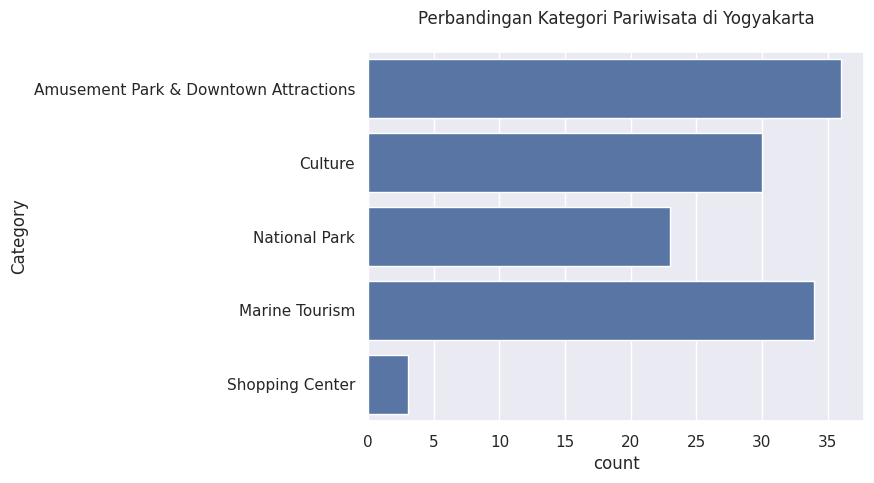

In [18]:
# membuat visualisasi kategori jumlah untuk destinasi Yogyakarta
sns.countplot(y='Category', data=place)
plt.title('Perbandingan Kategori Pariwisata di Yogyakarta', pad=20)
plt.show()

Dari hasil grafik diatas yaitu untuk memberikan gambaran mengenai distribusi jumlah tempat wisata yang terdaftar dalam berbagai kategori di Yogyakarta, membantu memahami jenis wisata yang paling banyak ada di daerah tersebut.

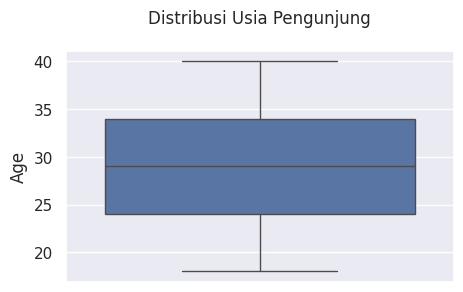

In [19]:
# memvisualisasikan distribusi pengunjung
plt.figure(figsize=(5,3))
sns.boxplot(user['Age']);
plt.title('Distribusi Usia Pengunjung', pad=20)
plt.show()

Distribusi pengunjung untuk mengetahui sebaran usia dari para pengunjung yang berpartisipasi dalam survei atau yang mengunjungi tempat wisata.

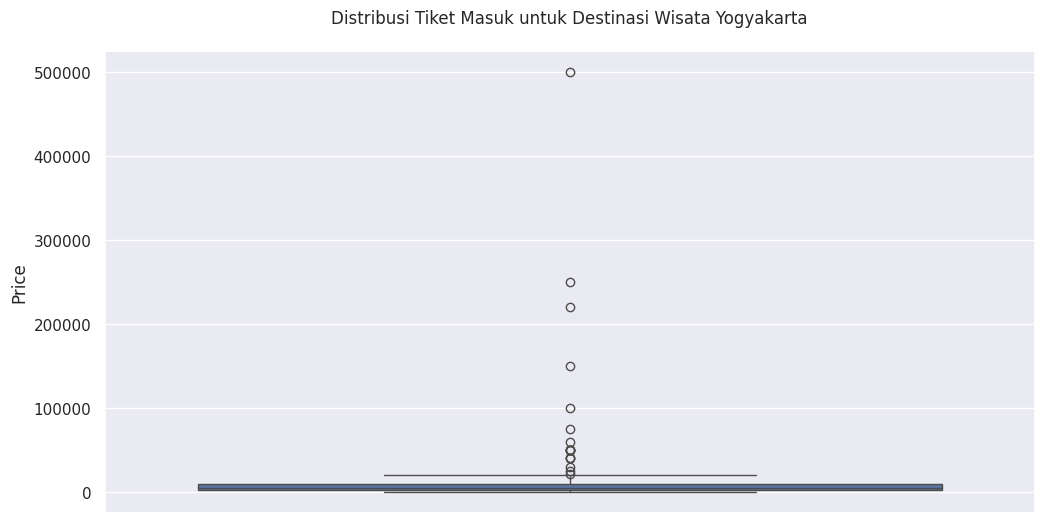

In [20]:
# memvisualisasikan rentang biaya masuk untuk tujuan
plt.figure(figsize=(12,6))
sns.boxplot(place['Price'])
plt.title('Distribusi Tiket Masuk untuk Destinasi Wisata Yogyakarta', pad=20)
plt.show()

Menunjukkan sebaran harga tiket masuk dari berbagai destinasi wisata di Yogyakarta.

In [21]:
# Mengagregasi Harga dan Waktu_Detik untuk kategori tujuan
place.groupby("Category").agg({"Price":["mean", "sum"],
                       "Time_Minutes":["mean", "sum"]})

Price         Time_Minutes  \
                                               mean     sum         mean   
Category                                                                   
Amusement Park & Downtown Attractions  13069.444444  470500    78.409091   
Culture                                33083.333333  992500    79.666667   
Marine Tourism                          7470.588235  254000    85.000000   
National Park                          31934.782609  734500    75.937500   
Shopping Center                            0.000000       0    60.000000   

                                               
                                          sum  
Category                                       
Amusement Park & Downtown Attractions  1725.0  
Culture                                1195.0  
Marine Tourism                          510.0  
National Park                          1215.0  
Shopping Center                          60.0

Dari tabel diatas ditujukan untuk mengetahui karakteristik biaya dan durasi kunjungan berdasarkan kategori tempat wisata.

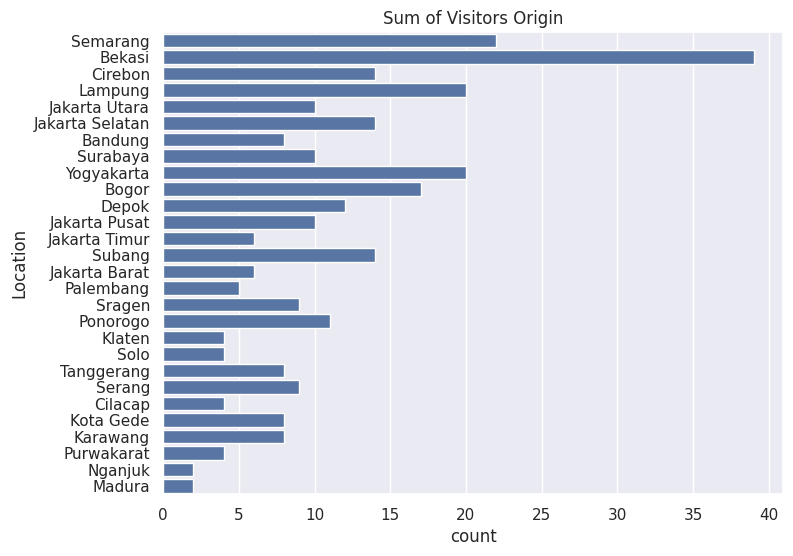

In [22]:
# memfilter asal kota pengunjung
askot = user['Location'].apply(lambda x : x.split(',')[0])

# memvisualisasikan asal kota pengunjung
plt.figure(figsize=(8,6))
sns.countplot(y=askot)
plt.title('Sum of Visitors Origin')
plt.show()

Menunjukkan distribusi asal pengunjung berdasarkan kota/kabupaten.

#**Data Preparation**

##Membuat Salinan untuk Penilaian Data

In [23]:
# membaca dataset untuk encoding
df = rating.copy()
df.head()

,User_Id,Place_Id,Place_Ratings
0,2,85,4
1,23,85,4
2,25,85,2
3,39,85,5
4,43,85,4


##Encoding

Sebelum membangun model machine learning atau sistem rekomendasi, kita perlu mengubah data kategorikal (seperti `User_Id` dan `Place_Id`) menjadi format numerik.
Ini penting karena sebagian besar algoritma hanya dapat memproses data dalam bentuk angka.

Di tahap ini, kita mendefinisikan fungsi `dict_encoder()` untuk mengubah setiap nilai unik dalam kolom tertentu menjadi angka integer yang unik pula.

In [24]:
def dict_encoder(col, data=df):

  # mengubah kolom dataframe menjadi daftar dengan nilai unik
  unique_val = data[col].unique().tolist()

  # mengenumerasi nilai kolom dari dataframe
  val_to_val_encoded = {x: i for i, x in enumerate(unique_val)}

  # proses encoding dari angka ke nilai kolom dataframe
  val_encoded_to_val = {i: x for i, x in enumerate(unique_val)}
  return val_to_val_encoded, val_encoded_to_val

Selanjutnya melakukan encoding terhadap kolom `User_Id`.
Tujuannya adalah untuk mengubah setiap pengguna menjadi angka unik sehingga dapat digunakan dalam proses perhitungan sistem rekomendasi atau analisis data lanjutan.

In [25]:
# Encoding User_Id
user_to_user_encoded, user_encoded_to_user = dict_encoder('User_Id')

# Mapping User_Id ke dalam dataframe
df['user'] = df['User_Id'].map(user_to_user_encoded)

Setelah encoding pengguna, kita lanjutkan dengan mengubah data `Place_Id` menjadi angka.
Langkah ini akan membantu dalam proses analisis interaksi pengguna dengan tempat wisata.

In [26]:
# Encoding Place_Id
place_to_place_encoded, place_encoded_to_place = dict_encoder('Place_Id')

# Mapping Place_Id ke dalam dataframe place
df['place'] = df['Place_Id'].map(place_to_place_encoded)

##Melihat Gambaran Umum Modelling Data

Sebelum membangun model, penting untuk memahami skala dan karakteristik data yang tersedia. Pada tahap ini, kita akan menghitung jumlah pengguna (`User`) dan jumlah tempat (`Place`) yang telah melalui proses encoding.

Kemudian, kita juga memastikan bahwa data pada kolom `Place_Ratings` berada dalam format numerik (`float32`) agar bisa diproses oleh algoritma machine learning. Informasi mengenai nilai **minimum** dan **maksimum rating** juga ditampilkan untuk memahami rentang penilaian yang diberikan pengguna terhadap tempat wisata.

Langkah ini sangat berguna sebagai gambaran awal sebelum masuk ke tahap pelatihan model.

In [27]:
# mendapatkan panjang user & user
num_users, num_place = len(user_to_user_encoded), len(place_to_place_encoded)

# mengubah rating menjadi float
df['Place_Ratings'] = df['Place_Ratings'].values.astype(np.float32)

# mendapatkan rating minimum dan maksimum
min_rating, max_rating = min(df['Place_Ratings']), max(df['Place_Ratings'])

print(f'Number of User: {num_users}, Number of Place: {num_place}, Min Rating: {min_rating}, Max Rating: {max_rating}')

Number of User: 300, Number of Place: 126, Min Rating: 1.0, Max Rating: 5.0


In [28]:
# mengacak dataset
df = df.sample(frac=1, random_state=42)
df.head(2)

,User_Id,Place_Id,Place_Ratings,user,place
729,194,115,4.0,130,30
2067,276,176,2.0,23,91


#**Modelling**

##Mengalokasikan data train dan test

Dilakukan pembagian data untuk menyiapkan data input (`x`) dan target (`y`) yang akan digunakan dalam proses pelatihan model sistem rekomendasi.

In [29]:
# membuat variabel x untuk mencocokkan user menjadi satu nilai
x = df[['user', 'place']].values

# membuat variabel y untuk memulai rating
y = df['Place_Ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# mengalokasikan data training 80% & data validation 20%
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

##Model Preparation

Pada tahap ini, kita membangun sebuah model rekomendasi berbasis *neural collaborative filtering* menggunakan TensorFlow Keras API. Model ini dinamakan `RecommenderNet` dan dibuat sebagai subclass dari `tf.keras.Model`. Model ini dilatih untuk mempelajari representasi laten dari pengguna dan tempat, sehingga dapat memprediksi seberapa besar kemungkinan seorang pengguna menyukai suatu tempat berdasarkan interaksi sebelumnya.

In [30]:
class RecommenderNet(tf.keras.Model):

  # Function initialization
  def __init__(self, num_users, num_places, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_places = num_places
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.places_embedding = layers.Embedding( # layer embeddings places
        num_places,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.places_bias = layers.Embedding(num_places, 1) # layer embedding places bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # layer embedding 2
    places_vector = self.places_embedding(inputs[:, 1]) # layer embedding 3
    places_bias = self.places_bias(inputs[:, 1]) # layer embedding 4

    dot_user_places = tf.tensordot(user_vector, places_vector, 2)

    x = dot_user_places + user_bias + places_bias

    return tf.nn.sigmoid(x) # activation sigmoid

Setelah arsitektur `RecommenderNet` didefinisikan, langkah berikutnya adalah mengkompilasi dan melatih model tersebut.

In [31]:
model = RecommenderNet(num_users, num_place, 50) # model initialization

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.0004),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Selanjutnya digunakan fungsi Callback dibuat untuk menghentikan pelatihan lebih awal jika nilai RMSE pada data validasi telah mencapai target tertentu (kurang dari 0.25). Hal ini bertujuan untuk:
- Menghindari overfitting,
- Menghemat waktu pelatihan.

In [32]:
 class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_root_mean_squared_error')<0.25):
      print('Fulfilled expected validation matrix')
      self.model.stop_training = True

Lalu, Model dilatih selama maksimum 100 *epoch* menggunakan data training, dan divalidasi dengan data validation (20% dari data). Selama proses ini, performa model dipantau melalui metrik RMSE. Pelatihan ini bertujuan agar model dapat memahami pola interaksi antara pengguna dan tempat berdasarkan histori rating.

In [33]:
# training

history = model.fit(
    x = x_train,
    y = y_train,
    epochs = 100,
    validation_data = (x_val, y_val),
    callbacks = [myCallback()]
)

Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.7310 - root_mean_squared_error: 0.3664 - val_loss: 0.7216 - val_root_mean_squared_error: 0.3603
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7223 - root_mean_squared_error: 0.3721 - val_loss: 0.7194 - val_root_mean_squared_error: 0.3589
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7034 - root_mean_squared_error: 0.3615 - val_loss: 0.7191 - val_root_mean_squared_error: 0.3588
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7065 - root_mean_squared_error: 0.3647 - val_loss: 0.7200 - val_root_mean_squared_error: 0.3593
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7051 - root_mean_squared_error: 0.3641 - val_loss: 0.7202 - val_root_mean_squared_error: 0.3594
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7066 - root_mean_squared_error: 0.3601 - val_loss: 0.7200 - val_root_mean_squared_error: 0.3593
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss:

#Evaluation Model

In [34]:
# Ambil data dari objek history
history_df = pd.DataFrame(history.history)

# Tambahkan kolom epoch
history_df['Epoch'] = history_df.index + 1

# Ubah nama kolom agar sesuai format yang diinginkan
formatted_df = history_df.rename(columns={
    'root_mean_squared_error': 'Train RMSE',
    'val_root_mean_squared_error': 'Validation RMSE',
    'loss': 'Train Loss',
    'val_loss': 'Validation Loss'
})

# Urutkan kolom sesuai permintaan
formatted_df = formatted_df[[
    'Epoch',
    'Train RMSE',
    'Validation RMSE',
    'Train Loss',
    'Validation Loss'
]]

# Tampilkan tabel
print("Hasil Evaluasi Model:\n")
print(formatted_df.to_string(index=False))

Hasil Evaluasi Model:

 Epoch  Train RMSE  Validation RMSE  Train Loss  Validation Loss
     1    0.371796         0.360339    0.725270         0.721583
     2    0.365690         0.358950    0.714963         0.719409
     3    0.359760         0.358761    0.705807         0.719116
     4    0.361359         0.359313    0.708173         0.719962
     5    0.359844         0.359449    0.705874         0.720192
     6    0.358068         0.359334    0.703300         0.720018
     7    0.358082         0.358947    0.703660         0.719373
     8    0.358366         0.358562    0.704075         0.718771
     9    0.353183         0.357621    0.696081         0.717286
    10    0.356412         0.357042    0.701163         0.716372
    11    0.352756         0.357184    0.695444         0.716623
    12    0.357525         0.356148    0.702481         0.715061
    13    0.354756         0.355780    0.698342         0.714517
    14    0.351756         0.355540    0.693956         0.714168
  

Tabel hasil evaluasi model diatas menampilkan informasi tentang RMSE dan Loss untuk pelatihan serta validasi pada setiap epoch akan muncul. Ini memberi gambaran jelas mengenai performa model dari awal hingga akhir pelatihan.

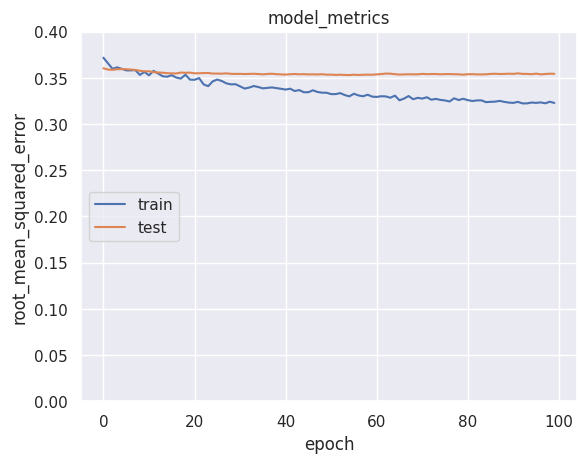

In [35]:
# menunjukkan plot loss and validation
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.ylim(ymin=0, ymax=0.4)
plt.legend(['train', 'test'], loc='center left')
plt.show()

Plot yang dihasilkan menunjukkan dua garis, satu untuk root_mean_squared_error pada data pelatihan dan satu untuk val_root_mean_squared_error pada data validasi, sehingga kita bisa memantau performa model pada kedua set data tersebut sepanjang epoch.

#Prediksi 7 Destinasi yang direkomendasikan

##Persiapan DataFrame untuk Menampilkan Rekomendasi

Pada langkah ini, kita menyiapkan DataFrame untuk menyusun informasi yang akan digunakan dalam sistem rekomendasi. Data ini mencakup tempat-tempat yang ada, dengan informasi seperti nama tempat, kategori, rating, dan harga. Selain itu, kita juga mengambil data rating dari pengguna untuk menentukan destinasi yang relevan berdasarkan interaksi pengguna.

In [36]:
place_df = place[['Place_Id','Place_Name','Category','Rating','Price']]
place_df.columns = ['id','place_name','category','rating','price']
df = rating.copy()

##Contoh user untuk Menampilkan Rekomendasi

Langkah berikutnya adalah memilih seorang pengguna secara acak, mengambil daftar tempat yang telah dikunjungi pengguna tersebut, dan menentukan tempat-tempat lain yang belum dikunjungi oleh pengguna tersebut untuk digunakan dalam rekomendasi.

In [37]:
# user sampling
user_id = df.User_Id.sample(1).iloc[0]
place_visited_by_user = df[df.User_Id == user_id]

In [38]:
# data location yang belum dikunjungi
place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user.Place_Id.values)]['id']
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)

place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

##Menampilkan Rekomendasi untuk user

Menampilkan rekomendasi tempat berdasarkan rating yang diprediksi oleh model. Sistem ini akan memberikan daftar 7 tempat teratas yang direkomendasikan untuk pengguna yang sebelumnya dipilih, berdasarkan tempat-tempat yang belum mereka kunjungi.

In [39]:
# top 7 Rekomendasi
ratings = model.predict(user_place_array).flatten()
top_ratings_indices = ratings.argsort()[-7:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]

print('Daftar rekomendasi untuk: {}'.format('User ' + str(user_id)))
print('===' * 15,'\n')
print('----' * 15)
print('Tempat dengan rating tertinggi dari user')
print('----' * 15)

top_place_user = (
    place_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)

place_df_rows = place_df[place_df['id'].isin(top_place_user)]
for row in place_df_rows.itertuples():
    print(row.place_name, ':', row.category)

print('')
print('----' * 15)
print('Top 7 rekomendasi tempat')
print('----' * 15)

recommended_place = place_df[place_df['id'].isin(recommended_place_ids)]
for row, i in zip(recommended_place.itertuples(), range(1,8)):
    print(i,'.', row.place_name, '\n    ', row.category, ',', 'Entrance Fee', row.price, ',', 'Rating', row.rating,'\n')

print('==='*15)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Daftar rekomendasi untuk: User 196

------------------------------------------------------------
Tempat dengan rating tertinggi dari user
------------------------------------------------------------
Situs Warungboto : Amusement Park & Downtown Attractions
Bukit Bintang Yogyakarta : Amusement Park & Downtown Attractions
Alun-alun Utara Keraton Yogyakarta : Culture
Pantai Parangtritis : Marine Tourism
Pantai Krakal : Marine Tourism

------------------------------------------------------------
Top 7 rekomendasi tempat
------------------------------------------------------------
1 . Sumur Gumuling 
     Amusement Park & Downtown Attractions , Entrance Fee 7000 , Rating 4.5 

2 . Monumen Yogya Kembali 
     Culture , Entrance Fee 15000 , Rating 4.5 

3 . Taman Pelangi Yogyakarta 
     Amusement Park & Downtown Attractions , Entrance Fee 15000 , Rating 4.3 

4 . The World Landmarks - Merapi Park Yogyakarta 
     Amusement Park & Downtown Attractions , En

Insight:

- Berdasarkan tempat yang sudah dikunjungi, user 213 memiliki minat yang kuat terhadap Marine Tourism (Wisata Laut), yang tercermin dalam beberapa rekomendasi tempat seperti Pantai Nguluran, Pantai Wediombo, dan Pantai Ngrenehan.
- Selain itu, ada juga rekomendasi yang berkaitan dengan National Park, seperti Taman Sungai Mudal, yang bisa memberikan variasi dalam pengalaman wisata alam pengguna.
- Semua tempat yang direkomendasikan memiliki rating yang cukup tinggi (di atas 4), menunjukkan bahwa destinasi-destinasi ini cukup populer dan disukai oleh pengunjung lain.